# Библиотеки

In [48]:
from zlib import crc32

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import re

# Код генерации выборки

In [29]:
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    alpha = rs.uniform()*10
    data = rs.randn(100, 2)
    data[:,1] = data[:, 0]
    data[:,1] += rs.randn(100)*alpha
    data[-1,0] = 99999
    return data

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [43]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task

Enter your mail: bogdanov.ai@phystech.edu


{'mail': 'bogdanov.ai@phystech.edu',
 'id': 1162440694,
 'data': array([[ 1.76965009e-01,  1.67185222e-01],
        [-5.22381859e-02,  1.52948957e-01],
        [ 2.35601706e+00,  1.04001460e+01],
        [ 3.52254196e-01, -7.33289837e+00],
        [ 1.25882984e-01,  5.00333874e+00],
        [ 7.16802647e-01,  6.76013657e+00],
        [ 8.70765485e-01, -5.08688946e+00],
        [-1.84758757e+00, -2.55185557e+00],
        [-1.03925314e+00,  1.73733258e-01],
        [-6.20087931e-01,  3.37853104e+00],
        [ 1.23645825e+00,  4.15316884e+00],
        [ 7.91092246e-01,  8.04141556e+00],
        [ 1.03598046e+00,  4.43492592e+00],
        [ 1.52571697e+00,  3.09206031e+00],
        [ 1.94024303e-02,  4.68792816e-01],
        [-2.22384447e-01, -4.10637216e+00],
        [ 7.80141985e-02,  2.43541532e+00],
        [ 7.45152350e-01, -3.29789071e+00],
        [ 1.12871813e-01, -7.94824912e+00],
        [ 5.44547772e-01,  4.15000976e+00],
        [ 1.62453158e+00, -2.98030895e+00],
        [ 5.

# Работа с выборкой

In [70]:
data = task['data']

## Существует ли линейная взаимосвязь между столбцами выборки по t-критерию Стьюдента?

In [71]:
_, pvalue = st.pearsonr(data[:, 0], data[:, 1])
print(pvalue)

0.2121925627310249


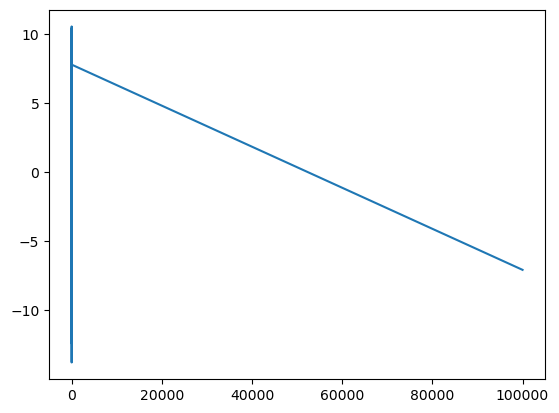

In [72]:
plt.plot(data[:, 0], data[:, 1])
plt.show()

Зависимости не существует.

## Существует ли линейная взаимосвязь между столбцами выборки по t-критерию Стьюдента, если исключить выбросы из выборки?

In [73]:
clear_data = data[(np.abs(st.zscore(data)) < 3).all(axis=1)]
_, pvalue = st.pearsonr(clear_data[:, 0], clear_data[:, 1])
print(pvalue)

0.00012614149291013203


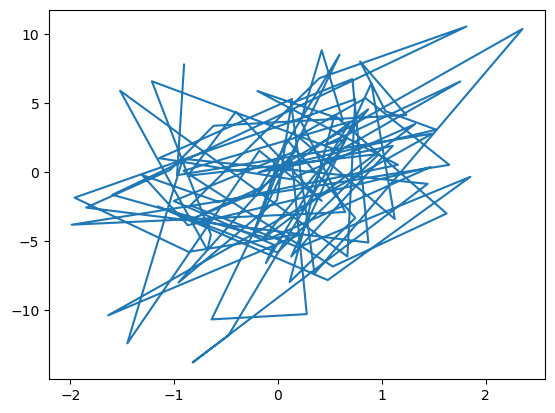

In [74]:
plt.plot(clear_data[:, 0], clear_data[:, 1])
plt.show()

Зависимость существует.

## Коэффициент корреляции Кендалла по исходной выборке (без удаления выбросов)

In [75]:
st.kendalltau(data[:, 0], data[:, 1])[0]

0.2173737373737374